In [1]:
import requests
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://api.pantaloons.com/store/getCurrentStore"

In [3]:
payload = json.dumps({
  "brand": "pantaloons",
  "validateHash": False,
  "hash": "b991e1b3d3352b7d89ce3df3cccec3e9",
  "utmSource": -1,
  "version": 3.4,
  "geoLocation": {
    "latitude": 0
  },
  "deviceType": "desktop",
  "fcmToken": "111",
  "deviceId": "bdec426-1a64-dfaa-de61-ad64daa2aa0c",
  "deviceToken": "d2a2bb1bd314801ec4aed24f978727e6.1680524955",
  "sessionId": "d2a2bb1bd314801ec4aed24f978727e6",
  "searchWord": " ",
  "cartId": 0,
  "customerId": 0,
  "sliderSource": -1,
  "cartOperation": "add"
})
headers = {
  'authority': 'api.pantaloons.com',
  'accept': 'application/json',
  'accept-language': 'en-US,en;q=0.9',
  'content-type': 'application/json',
  'env': 'prod',
  'origin': 'https://www.pantaloons.com',
  'referer': 'https://www.pantaloons.com/',
  'sec-ch-ua': '"Google Chrome";v="111", "Not(A:Brand";v="8", "Chromium";v="111"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site': 'same-site',
  'securekey': '12345',
  'source': 'desktop',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
}


In [4]:
data = requests.post(url, headers=headers, data=payload)

print(data.text.encode('utf8'))

In [5]:
data.status_code

200

In [6]:
stores = json.loads(data.text)

In [7]:
stores['results']

In [8]:
stores.keys()

dict_keys(['success', 'results', 'msg', 'cache', 'ttl', 'hash'])

In [9]:
del stores['success']
del stores['msg']
del stores['cache']
del stores['hash']
del stores['ttl']

In [10]:
with open('Pantaloon_Locations.csv', 'w', encoding = 'utf-8') as pt:
    
    writer = csv.writer(pt, delimiter = ",", quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    
    writer.writerow([
        "Retek_code",
        "store_name",
        "city",
        "pincode",
        "address",
        "latitude",
        "longitude",
        "contact",
        "whatsapp",
        "manager_contact",
        "opening",
        "closing"
        
    ])
    
    for store in stores['results']:
        row = []
        retek_code = store['retek_code']
        store_name = store['store_name']
        city = store['city']
        pincode = store['pincode']
        address = store['address']
        latitude = store['latitude']
        longitude = store['longitude']
        contact = store['phone_number']
        whatsapp = store['whatsapp_number']
        manager_contact = store['store_manager_contact']
        opening = store['open_timings']
        closing = store['closing_time']

        
        row.append(retek_code)
        row.append(store_name)
        row.append(city)
        row.append(pincode)
        row.append(address)
        row.append(latitude)
        row.append(longitude)
        row.append(contact)
        row.append(whatsapp)
        row.append(manager_contact)
        row.append(opening)
        row.append(closing)
        
        writer.writerow(row)

In [11]:
pantaloon = pd.read_csv('Pantaloon_Locations.csv')

In [12]:
pantaloon.head()

,Retek_code,store_name,city,pincode,address,latitude,longitude,contact,whatsapp,manager_contact,opening,closing
0,P023_1000,ROHINI,New Delhi,110085,"Unitech Metro Walk, Sector 10, Near Rithala Me...",28.723936,77.112953,01127574183,918929301611,9990629052,11:00 AM,9:30 PM
1,P097_1000,NORTH COUNTRY MALL,Mohali,140307,"F-15, NC Mall, Kharar Mohali Road, National Hi...",30.738764,76.678627,01726703258,911726703258,8729007627,11:00 AM,9:30 PM
2,P002_1000,BEGUMPET,Hyderabad,500016,"Saptagiri Towers Begumpet, S. P. Road, Hyderab...",17.444366,78.462822,9513703084,919513703084,7660004347,11:00 AM,9:30 PM
3,P154_1000,NAINITAL ROAD,Haldwani,263126,"Pantaloons, Walkway Mall, Nainital Road, NH-87...",29.245142,79.533470,05946282899,915946282899,7895692666,11:00 AM,9:30 PM
4,P140_1000,SIGRA,Varanasi,221010,"D-58/12, A1, Gandhinagar, Sigra, Varanasi - 22...",25.311197,82.987038,7248001118,9.15E+11,7248001118,11:00 AM,9:30 PM


In [13]:
print(pantaloon.shape)
print(pantaloon.dtypes)

(422, 12)
Retek_code          object
store_name          object
city                object
pincode              int64
address             object
latitude           float64
longitude          float64
contact             object
whatsapp            object
manager_contact     object
opening             object
closing             object
dtype: object


In [14]:
pantaloon.isna().sum()

Retek_code          0
store_name          0
city                0
pincode             0
address             0
latitude            0
longitude           0
contact             0
whatsapp           14
manager_contact    26
opening             6
closing             6
dtype: int64

In [15]:
pantaloon.city.value_counts().head(10)

Kolkata      24
Bengaluru    23
Mumbai       21
Chennai      17
Pune         16
Hyderabad    14
New Delhi    13
Ahmedabad    13
Gurugram      9
Lucknow       7
Name: city, dtype: int64

Text(0, 0.5, 'Fraction/Percent')

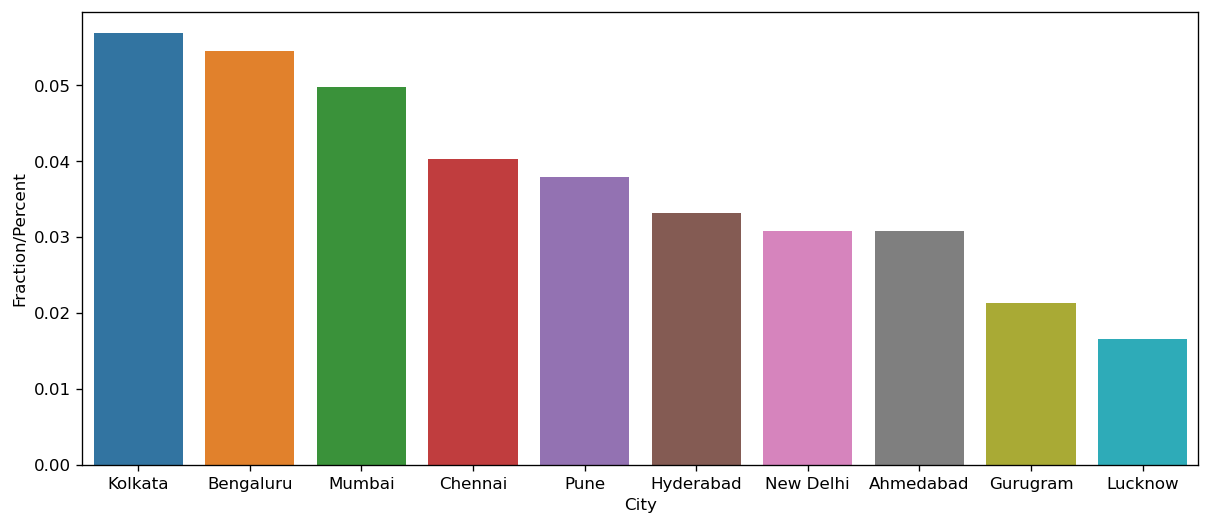

In [16]:
plt.figure(figsize = (12,5), dpi = 120)
city_count = pantaloon['city'].value_counts(normalize=True).head(10)
sns.barplot(city_count.index, city_count, order = city_count.index)
plt.xlabel('City')
plt.ylabel('Fraction/Percent')